<a href="https://colab.research.google.com/github/Noahbrauer/Logistical-Regression-and-NN/blob/master/ML_Comp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import accuracy_score
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.neighbors           import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn        import preprocessing
from sklearn        import utils

X_train = np.loadtxt("roxie_train_features.csv", delimiter=",")[:,1:]
X_test = np.loadtxt("roxie_test_features.csv", delimiter=",")
ids_test = X_test[:,(0,)]
X_test = X_test[:,1:]
y_train = np.loadtxt("roxie_train_values.csv", delimiter=",", ndmin=2)[:,(1,)]

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)


In [ ]:

# Number of neighbors to use by default for kneighbors queries.
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 100, num = 50)] 
# Weight function used in prediction. Possible values:  
weights = ['uniform','distance']
# The distance metric to use for the tree.
metric = ['euclidean','manhattan','chebyshev'] 
# Maximum number of levels in tree
algorithm = ['ball_tree', 'kd_tree', 'brute']

random_grid = {
    'n_neighbors': n_neighbors,
    'weights': weights,
    'metric': metric,
    'algorithm' : algorithm,
}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
knn = KNeighborsRegressor()
# Random search of parameters
knn_random = RandomizedSearchCV(estimator = knn, random_state = 42,n_jobs = -1, param_distributions = random_grid,n_iter = 100, cv=3,verbose = 2)
# Fit the random search model
knn_random.fit(X_train, y_train_encoded)
print(knn_random)

mdl = KNeighborsClassifier(n_neighbors = 3)
mdl.fit(X_train, y_train_encoded)

In [ ]:
predict = knn_random.predict(X_new_test)
print(predict)

[ 90. 134. 181. ... 114. 201. 150.]


(670800,)
[192.5         99.9375     208.02       ... 172.67567568 181.
 182.22222222]


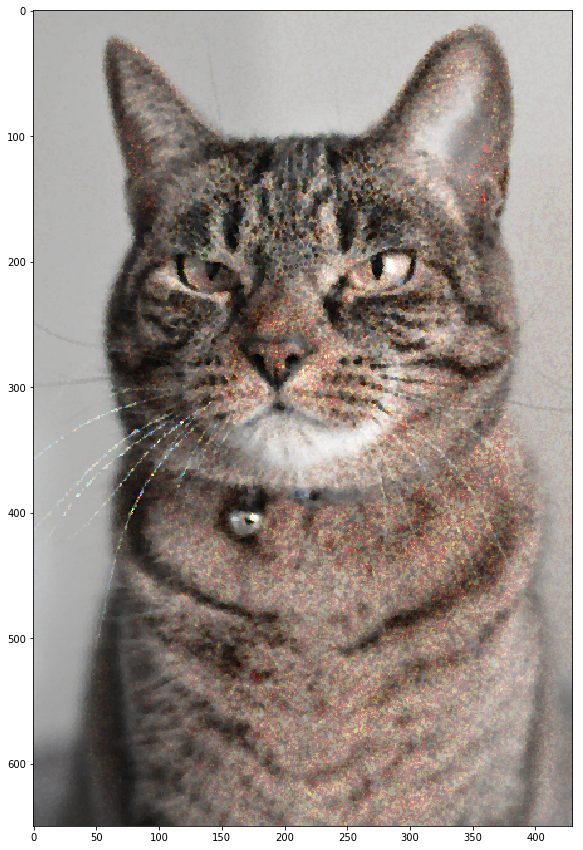

In [ ]:
# make predictions on test data
y_pred = knn_random.predict(X_test)
print(y_pred.shape)
print(y_pred)

output = np.concatenate((ids_test, y_pred[:,np.newaxis]), axis=1)
np.savetxt("Comp2_submission.csv", output, delimiter=",", fmt='%1.4f', header='ID,intensity')


# this file contains all pixels (the union of the train and test sets)
X_full = np.loadtxt("roxie_full_features.csv", delimiter=",")

# make predictions for all pixels
y_pred = mdl.predict(X_full)
# show it as an image
plt.figure(figsize=(10,15))
plt.imshow(y_pred.reshape((650,430,3)));

In [ ]:
print(knn_random)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 100], 'metric': ['euclidean', 'manhattan', 'chebyshev'], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)
